## Motivation

In [ ]:
dirRoot = '/store/dataset/zoom/X4/train'

subDirs = ['HR', 'LR']

file_name = '00006_00005.png'
import os
import numpy as np

HR_path = os.path.join(dirRoot, subDirs[0],file_name)
LR_path = os.path.join(dirRoot, subDirs[1],file_name)


from PIL import Image
HR_img = Image.open(HR_path)
LR_img = Image.open(LR_path)

d_HR = HR_img.resize(LR_img.size)
u_d_HR = d_HR.resize(HR_img.size)

u_LR = LR_img.resize(HR_img.size)


import matplotlib.pyplot as plt
plt.figure(figsize=(12,12))

plt.subplot(331)
plt.title("LR")
plt.imshow(LR_img)

plt.subplot(332)
plt.title("HR")
plt.imshow(HR_img)

plt.subplot(333)
plt.title("HR")
plt.imshow(HR_img)

plt.subplot(334)
plt.title("downsample HR")
plt.imshow(d_HR)


plt.subplot(335)
plt.title("upsample LR")
plt.imshow(u_LR)

plt.subplot(336)
plt.title("upsample downsample HR")
plt.imshow(u_d_HR)

## difference between zoom and tranditional SR
LR_np = np.array(LR_img) / 255.0
d_HR_np = np.array(d_HR) / 255.0
min_img_t = np.abs(LR_np - d_HR_np)
min_img_t_scale = (min_img_t - np.min(min_img_t)) / (np.max(min_img_t) - np.min(min_img_t))

plt.subplot(337)
plt.title("LR - downsample_HR")
plt.imshow(min_img_t_scale)

## the lost information between zoom LR => HR 
HR_np = np.array(HR_img) / 255.0
u_LR_np = np.array(u_LR) / 255.0
loss_info = np.abs(HR_np - u_LR_np)
loss_info_scale = (loss_info - np.min(loss_info)) / (np.max(loss_info) - np.min(loss_info))

plt.subplot(338)
plt.title("HR - u_LR")
plt.imshow(loss_info_scale)

## the lost information between up-down HR => HR 
HR_np = np.array(HR_img) / 255.0
u_d_HR_np = np.array(u_d_HR) / 255.0
loss_info = np.abs(HR_np - u_d_HR_np)
loss_info_scale = (loss_info - np.min(loss_info)) / (np.max(loss_info) - np.min(loss_info))

plt.subplot(339)
plt.title("HR - u_d_HR")
plt.imshow(loss_info_scale)



#plt.savefig("motivation.pdf", format='pdf', transparent=False, dpi=512, pad_inches = 0)
plt.savefig("motivation.png", format='png', transparent=False, dpi=512, pad_inches = 0)


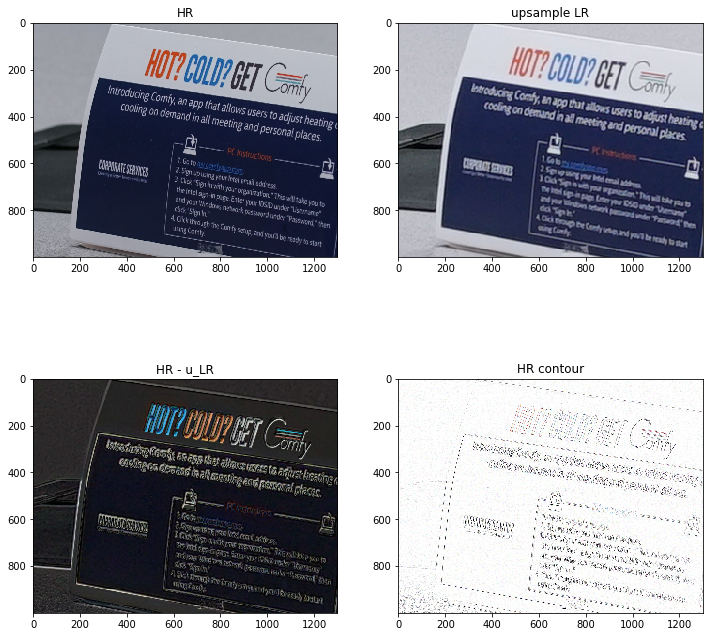

In [15]:
dirRoot = '/store/dataset/zoom/X4/train'

subDirs = ['HR', 'LR']

file_name = '00006_00005.png'
import os
import numpy as np

HR_path = os.path.join(dirRoot, subDirs[0],file_name)
LR_path = os.path.join(dirRoot, subDirs[1],file_name)


from PIL import Image
HR_img = Image.open(HR_path)
LR_img = Image.open(LR_path)

d_HR = HR_img.resize(LR_img.size)
u_d_HR = d_HR.resize(HR_img.size)


u_LR = LR_img.resize(HR_img.size)


import matplotlib.pyplot as plt
plt.figure(figsize=(12,12))

box = (1200, 500, 2500, 1500)
HR_img = HR_img.crop(box)
u_LR = u_LR.crop(box)


plt.subplot(221)
plt.title("HR")
plt.imshow(HR_img)






plt.subplot(222)
plt.title("upsample LR")
plt.imshow(u_LR)





## the lost information between zoom LR => HR 
HR_np = np.array(HR_img) / 255.0
u_LR_np = np.array(u_LR) / 255.0
loss_info = np.abs(HR_np - u_LR_np)
loss_info_scale = (loss_info - np.min(loss_info)) / (np.max(loss_info) - np.min(loss_info))
loss_info_scale = Image.fromarray((loss_info_scale * 255).astype(np.uint8))

plt.subplot(223)
plt.title("HR - u_LR")
plt.imshow(loss_info_scale)


from PIL import ImageFilter
HR_contour = HR_img.filter(ImageFilter.CONTOUR).filter(ImageFilter.DETAIL)
HR_edge = HR_img.filter(ImageFilter.EDGE_ENHANCE_MORE)

difference = loss_info_scale.filter(ImageFilter.CONTOUR)

enhance_difference = Image.blend(loss_info_scale,u_LR,0.5)
plt.subplot(224)
plt.title("HR contour")
plt.imshow(HR_contour)

#plt.show()

#plt.savefig("motivation.pdf", format='pdf', transparent=False, dpi=512, pad_inches = 0)
plt.savefig("motivation.png", format='png', transparent=False, dpi=512, pad_inches = 0)

#HR_img.save("HR.png")
#u_LR.save("LR.png")
#Image.fromarray((loss_info_scale * 255).astype(np.uint8)).save("difference.png")

In [17]:
np.linspace(1,5,1)

array([1.])

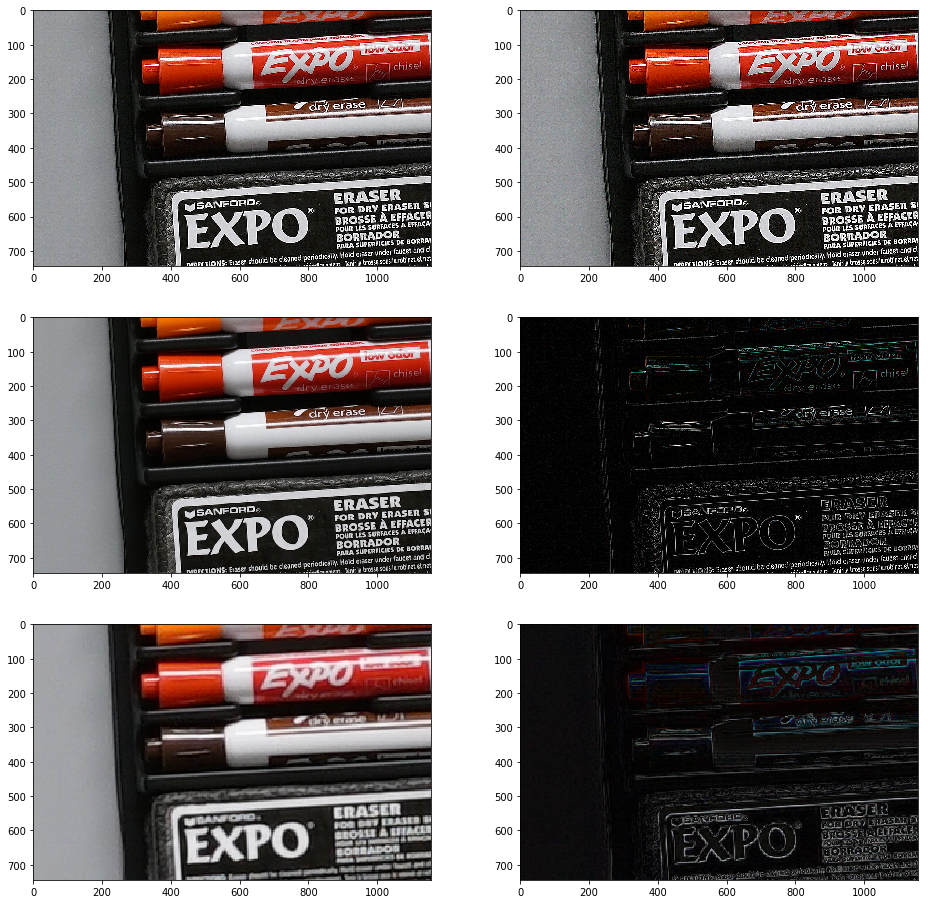

[[[149 152 153]
  [148 150 151]
  [150 152 154]
  ...
  [ 96  21   0]
  [ 96  21   0]
  [ 96  22   0]]

 [[151 152 154]
  [  0   0   0]
  [ 14   3   2]
  ...
  [  0  11   0]
  [  0   8   0]
  [ 89  22   0]]

 [[151 152 154]
  [  0   0   0]
  [  0   0   0]
  ...
  [  0   0   0]
  [  0   0   0]
  [ 86  21   0]]

 ...

 [[146 151 154]
  [  0   0   1]
  [ 11  10  12]
  ...
  [  0   0   0]
  [  0   0   0]
  [ 19  20  17]]

 [[147 151 153]
  [  0   0   0]
  [ 12  12  17]
  ...
  [  0   0   0]
  [  0   0   0]
  [ 14  17  13]]

 [[151 152 156]
  [152 152 156]
  [154 155 159]
  ...
  [ 91  95  94]
  [ 33  34  33]
  [  8   8   6]]]


In [56]:
dirRoot = '/store2/dataset/SR/train_data/SRRAW/X4/train'

subDirs = ['HR', 'LR']

file_name = '00010_00006.png'
#file_name = '00006_00005.png'
#file_name = '00373_00005.png'
#file_name = '00004_00005.png'
import os
import numpy as np
from PIL import ImageFilter
from PIL import ImageChops


HR_path = os.path.join(dirRoot, subDirs[0],file_name)
LR_path = os.path.join(dirRoot, subDirs[1],file_name)
from PIL import Image
HR_img = Image.open(HR_path)
LR_img = Image.open(LR_path)

u_LR_img = LR_img.resize(HR_img.size)

##Resize IMAGE
#HR_img = HR_img.resize((int(HR_img.size[0]/4), int(HR_img.size[1]/4)))
#u_LR_img = u_LR_img.resize((int(u_LR_img.size[0]/4), int(u_LR_img.size[1]/4)))
#print(HR_img.size)

box = (HR_img.size[0]/4,HR_img.size[1]/4,HR_img.size[0]*3/4,HR_img.size[1]*3/4)

#print(box)
HR_img = HR_img.crop(box)
u_LR_img = u_LR_img.crop(box)

d = np.array(HR_img) - np.array(u_LR_img)
d = ImageChops.difference(HR_img,u_LR_img)
#d = d.filter(ImageFilter.EDGE_ENHANCE_MORE)
#.filter(ImageFilter.DETAIL)
d.save("d.png")
## ImageFilter.FIND_EDGES
img1 = HR_img.filter(ImageFilter.EDGE_ENHANCE)
img2 = HR_img.filter(ImageFilter.EDGE_ENHANCE_MORE)
img3 = HR_img.filter(ImageFilter.SHARPEN)
img4 = HR_img.filter(ImageFilter.FIND_EDGES)

img4_e = img4.filter(ImageFilter.EDGE_ENHANCE_MORE)
#.filter(ImageFilter.DETAIL)
img4_e.save("edge_e.png")
img2_np = np.array(img2) - np.array(HR_img)
img3_np = np.array(img3) - np.array(HR_img)
#print(img3_np)


import matplotlib.pyplot as plt
plt.figure(figsize=(16,16))
plt.subplot(321)
plt.imshow(img1)

plt.subplot(322)
plt.imshow(img2)

plt.subplot(323)
plt.imshow(img3)

plt.subplot(324)
plt.imshow(img4)

plt.subplot(325)
plt.imshow(u_LR_img)

plt.subplot(326)
plt.imshow(d)

plt.show()

print(np.array(img4))

In [16]:
s_data = "/store/dataset/zoom/train"

import glob
import os

# names_img = sorted(glob.glob(os.path.join(s_data,'*','*.JPG')))

# print(len(names_img))

# for name_img in names_img:
#     name_img = name_img.replace(s_data, "/store/dataset/zoom/train1/train")
#     print(name_img)


subDirs  = sorted(os.listdir(s_data))
i = 0
for subDir in subDirs:
    s_dir = os.path.join(s_data, subDir)
    filenames = sorted(glob.glob(os.path.join(s_dir,'*.JPG')))
    if(len(filenames)<7):
        print(len(filenames), s_dir)
        i = i + 1

i


6 /store/dataset/zoom/train/00030
6 /store/dataset/zoom/train/00032
6 /store/dataset/zoom/train/00033
6 /store/dataset/zoom/train/00034
6 /store/dataset/zoom/train/00193
6 /store/dataset/zoom/train/00194
6 /store/dataset/zoom/train/00195
6 /store/dataset/zoom/train/00196
6 /store/dataset/zoom/train/00197
6 /store/dataset/zoom/train/00198
6 /store/dataset/zoom/train/00199
6 /store/dataset/zoom/train/00200
6 /store/dataset/zoom/train/00201
6 /store/dataset/zoom/train/00202
6 /store/dataset/zoom/train/00203
6 /store/dataset/zoom/train/00204
6 /store/dataset/zoom/train/00205
6 /store/dataset/zoom/train/00206
6 /store/dataset/zoom/train/00207
6 /store/dataset/zoom/train/00208
6 /store/dataset/zoom/train/00209
6 /store/dataset/zoom/train/00266
5 /store/dataset/zoom/train/00267
6 /store/dataset/zoom/train/00268
6 /store/dataset/zoom/train/00269
6 /store/dataset/zoom/train/00270
6 /store/dataset/zoom/train/00271
4 /store/dataset/zoom/train/00350
6 /store/dataset/zoom/train/00392
6 /store/datas

32

In [18]:
s_data = "/store/dataset/zoom/train1/train"

import glob
import os

# names_img = sorted(glob.glob(os.path.join(s_data,'*','*.JPG')))

# print(len(names_img))

# for name_img in names_img:
#     name_img = name_img.replace(s_data, "/store/dataset/zoom/train1/train")
#     print(name_img)


subDirs  = sorted(os.listdir(s_data))
i = 0
for subDir in subDirs:
    s_dir = os.path.join(s_data, subDir)
    filenames = sorted(glob.glob(os.path.join(s_dir,'*.JPG')))
    if(len(filenames)<7):
        print(len(filenames), s_dir)
        i = i + 1 
i

6 /store/dataset/zoom/train1/train/00030
6 /store/dataset/zoom/train1/train/00032
6 /store/dataset/zoom/train1/train/00033
6 /store/dataset/zoom/train1/train/00034
6 /store/dataset/zoom/train1/train/00193
6 /store/dataset/zoom/train1/train/00194
6 /store/dataset/zoom/train1/train/00195
6 /store/dataset/zoom/train1/train/00196
6 /store/dataset/zoom/train1/train/00197
6 /store/dataset/zoom/train1/train/00198
6 /store/dataset/zoom/train1/train/00199
6 /store/dataset/zoom/train1/train/00200
6 /store/dataset/zoom/train1/train/00201
6 /store/dataset/zoom/train1/train/00202
6 /store/dataset/zoom/train1/train/00203
6 /store/dataset/zoom/train1/train/00204
6 /store/dataset/zoom/train1/train/00205
6 /store/dataset/zoom/train1/train/00206
6 /store/dataset/zoom/train1/train/00207
6 /store/dataset/zoom/train1/train/00208
6 /store/dataset/zoom/train1/train/00209
6 /store/dataset/zoom/train1/train/00266
5 /store/dataset/zoom/train1/train/00267
6 /store/dataset/zoom/train1/train/00268
6 /store/dataset

33

In [3]:
from model.ssl import EDSR_SSL
from option import args
model = EDSR_SSL(args)

usage: ipykernel_launcher.py [-h] --desc DESC [--debug] [--template TEMPLATE]
                             [--n_threads N_THREADS] [--cpu] [--n_GPUs N_GPUS]
                             [--seed SEED] [--dir_data DIR_DATA]
                             [--wb_root WB_ROOT] [--dir_demo DIR_DEMO]
                             [--data_train DATA_TRAIN] [--data_test DATA_TEST]
                             [--data_range DATA_RANGE] [--ext {sep_reset,sep}]
                             [--scale SCALE] [--patch_size PATCH_SIZE]
                             [--test_patch_size TEST_PATCH_SIZE]
                             [--rgb_range RGB_RANGE] [--n_colors N_COLORS]
                             [--chop] [--no_augment] [--labels LABELS]
                             [--model {EDSR,MDSR,RDN,RCAN,SAN,SRResNet,SSL}]
                             [--act ACT] [--pre_train PRE_TRAIN]
                             [--extend EXTEND] [--n_resblocks N_RESBLOCKS]
                             [--n_feats N_FEATS] [

SystemExit: 2

/home/ibrain/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3304: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)
